In [1]:
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt


      Rk            Player   Pos  Age   Tm   G  GS    MP   FG   FGA  ...  \
0      1  Precious Achiuwa  C-PF   24  TOT  46   7  20.4  3.2   6.5  ...   
1      1  Precious Achiuwa     C   24  TOR  25   0  17.5  3.1   6.8  ...   
2      1  Precious Achiuwa    PF   24  NYK  21   7  23.9  3.2   6.1  ...   
3      2       Bam Adebayo     C   26  MIA  43  43  34.5  7.6  15.0  ...   
4      3      Ochai Agbaji    SG   23  TOT  52  10  19.7  2.1   5.0  ...   
..   ...               ...   ...  ...  ...  ..  ..   ...  ...   ...  ...   
624  533    Thaddeus Young    PF   35  TOR  23   6  15.2  2.3   3.8  ...   
625  534        Trae Young    PG   25  ATL  48  48  36.6  8.5  19.6  ...   
626  535    Omer Yurtseven     C   25  UTA  28   6   9.5  1.4   2.9  ...   
627  536       Cody Zeller     C   31  NOP  36   0   8.0  0.6   1.5  ...   
628  537       Ivica Zubac     C   26  LAC  41  41  26.6  5.1   7.8  ...   

       FT%  ORB  DRB   TRB   AST  STL  BLK  TOV   PF   PTS  
0    0.625  2.3  3.6   5.9

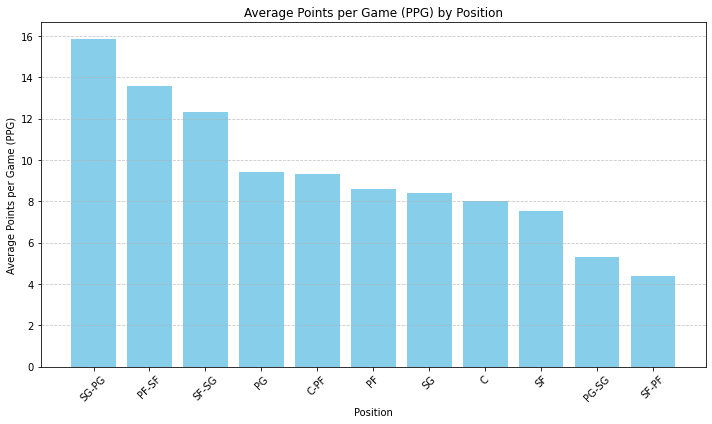

In [5]:

# Step 1: Load the Data
file_path = "/Users/kareemkassamia/Downloads/2023-2024 NBA Player Stats - Regular.csv"
data = pd.read_csv(file_path,encoding='latin-1')

# Step 2: Explore the Data
print(data)

# Step 3: Clean the Data (if necessary)
# Example:
# data.dropna(inplace=True)  # Drop rows with missing values
# Aggregate Data by Position
position_ppg = data.groupby('Pos')['PTS'].mean().reset_index()

# Sort positions by average points per game
position_ppg_sorted = position_ppg.sort_values(by='PTS', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(position_ppg_sorted['Pos'], position_ppg_sorted['PTS'], color='skyblue')
plt.xlabel('Position')
plt.ylabel('Average Points per Game (PPG)')
plt.title('Average Points per Game (PPG) by Position')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


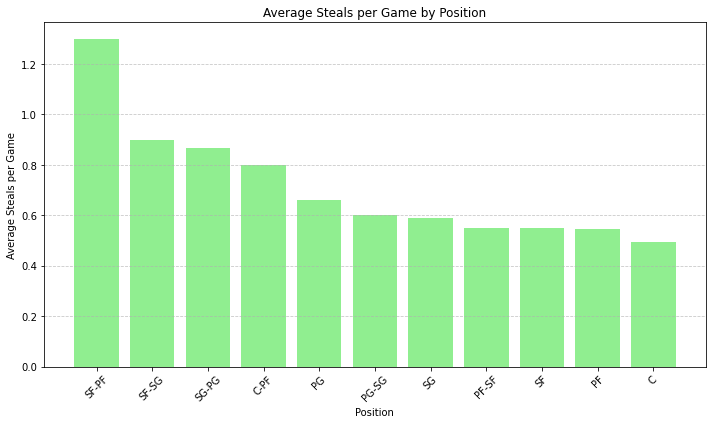

In [6]:
position_steals = data.groupby('Pos')['STL'].mean().reset_index()

# Sort positions by average steals per game
position_steals_sorted = position_steals.sort_values(by='STL', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(position_steals_sorted['Pos'], position_steals_sorted['STL'], color='lightgreen')
plt.xlabel('Position')
plt.ylabel('Average Steals per Game')
plt.title('Average Steals per Game by Position')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

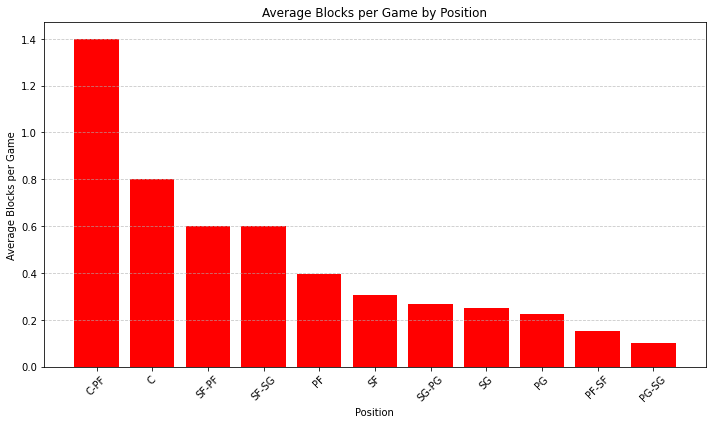

In [7]:
# Aggregate Data by Position
position_blocks = data.groupby('Pos')['BLK'].mean().reset_index()

# Sort positions by average blocks per game
position_blocks_sorted = position_blocks.sort_values(by='BLK', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(position_blocks_sorted['Pos'], position_blocks_sorted['BLK'], color='red')
plt.xlabel('Position')
plt.ylabel('Average Blocks per Game')
plt.title('Average Blocks per Game by Position')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

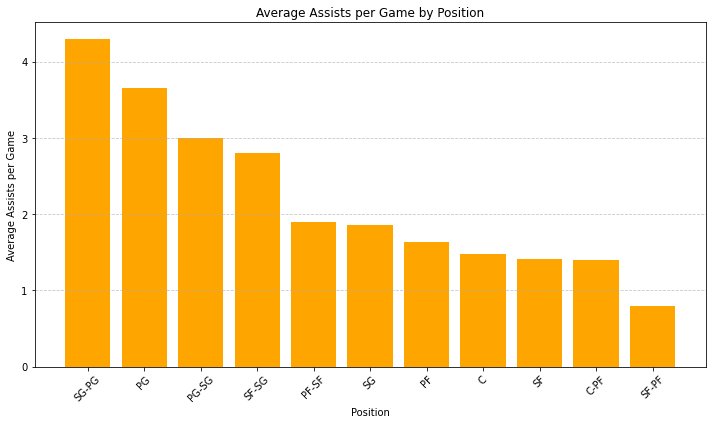

In [23]:
# Aggregate Data by Position
position_assists = data.groupby('Pos')['AST'].mean().reset_index()

# Sort positions by average assists per game
position_assists_sorted = position_assists.sort_values(by='AST', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(position_assists_sorted['Pos'], position_assists_sorted['AST'], color='orange')
plt.xlabel('Position')
plt.ylabel('Average Assists per Game')
plt.title('Average Assists per Game by Position')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [27]:
import scipy as sp
G = nx.Graph()

# Step 3: Add Nodes to the Graph
# Each player is represented as a node
players = data['Player'].tolist()
for player in players:
    G.add_node(player)

# Step 4: Add Edges to the Graph
# Relationships between players can be based on shared teams or other connections
# For simplicity, we'll add edges based on shared team
for _, row in data.iterrows():
    player = row['Player']
    team = row['Tm']
    players_in_same_team = data[data['Tm'] == team]['Player'].tolist()
    for other_player in players_in_same_team:
        if other_player != player:
            G.add_edge(player, other_player)

# Step 5: Visualize the Graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10)
plt.title('NBA Player Network Based on Shared Team')
plt.show()


AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

<Figure size 864x576 with 0 Axes>